# Machine Learning 1

Our dataset is from Kaggle: "Heart Disease Dataset" by *Mazaharul Hasnine Mirza

Source: https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

We will start with our first part of Machine Learning in this notebook. We will be using the following Machine Learning models from `Scikit-learn`

**Classification**
- DecisionTreeClassifier
- RandomForestClassifier

**Preprocessing**
- StandardScaler
- OneHotEncoder

**Others**
- Resample
- GridSearchCV

More details on these ML models can be found at this link: https://scikit-learn.org/stable/


# Data Preparation

let's start by importing the essential python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

<function seaborn.rcmod.set(*args, **kwargs)>

## A Glance at the Cleaned Dataset

Let's import the file **heart_dis_cln.csv** which contains the cleaned data, prepared in our previous notebook.

In [2]:
heart_dis_cln = pd.read_csv('heart_dis_cln.csv')
heart_dis_cln

,Unnamed: 0,GENDER,AGE,AGEGROUP,EDUCATION,CURRENT_SMOKER,CIGS_PER_DAY,BP_MEDICATION,PREV_STROKE,PREV_HYPERTENSION,DIABETES,TOT_CHOLESTEROL,SYSTOLIC_BP,DIASTOLIC_BP,BMI,HEART_RATE,GLUCOSE_LEVEL,HEART_STROKE
0,0,Male,39,30-39,Postgraduate,False,0.0,False,False,False,False,195.0,106.0,70.0,26.97,80.0,77.0,False
1,1,Female,46,40-49,Primary School,False,0.0,False,False,False,False,250.0,121.0,81.0,28.73,95.0,76.0,False
2,2,Male,48,40-49,Uneducated,True,20.0,False,False,False,False,245.0,127.5,80.0,25.34,75.0,70.0,False
3,3,Female,61,60-69,Graduate,True,30.0,False,False,True,False,225.0,150.0,95.0,28.58,65.0,103.0,True
4,4,Female,46,40-49,Graduate,True,23.0,False,False,False,False,285.0,130.0,84.0,23.10,85.0,85.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,4232,Male,68,60-69,Uneducated,False,0.0,False,False,True,False,176.0,168.0,97.0,23.14,60.0,79.0,True
3649,4233,Male,50,50-59,Uneducated,True,1.0,False,False,True,False,313.0,179.0,92.0,25.97,66.0,86.0,True
3650,4234,Male,51,50-59,Graduate,True,43.0,False,False,False,False,207.0,126.5,80.0,19.71,65.0,68.0,False
3651,4235,Female,48,40-49,Primary School,True,20.0,NotDefined,False,False,False,248.0,131.0,72.0,22.00,84.0,86.0,False


Our dataset is from Kaggle: "Heart Disease Dataset" by *Mazaharul Hasnine Mirza

Source: https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

> **Gender**: gender of the patient   
> **Age**: age of the patient (years)  
> **education**: uneducated, primaryschool, graduate, postgraduate    
> **currentSmoker**: 0 (No), 1 (Yes)   
> **cigsPerDay**: Number of cigarettes per day = 0...70   
> **BPMeds**: Whether or not the person is taking blood pressure drugs = 0 (No), 1 (Yes)    
> **prevalentStroke**: Whether or not the person has had a stroke = 0 (No), 1 (Yes)   
> **prevalentHyp**: Blood pressure (BP) > = 140 mm Hg systolic and/or > = 90 diastolic = 0 (No), 1 (Yes)   
> **diabetes**: Whether or not the person has diabetes = 0 (No), 1 (Yes)   
> **TotChol**: total serum cholesterol (mm/dl)   
> **sysBP**: Systolic blood pressure = 84...220   
> **diaBP**: Diastolic blood pressure = 48...140   
> **BMI**: Body Mass Index = 16...57   
> **heartRate**: Heart rate = 44...143   
> **glucose**: Blood Sugar = 40...394   
> **Heart_stroke**: Whether or not the person has had a heart attack = 0 (No), 1 (Yes)   

In [3]:
print("Data type:\t", type(heart_dis_cln))
print("Data dims:\t", heart_dis_cln.shape)

Data type:	 <class 'pandas.core.frame.DataFrame'>
Data dims:	 (3653, 18)


In [4]:
heart_dis_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3653 non-null   int64  
 1   GENDER             3653 non-null   object 
 2   AGE                3653 non-null   int64  
 3   AGEGROUP           3653 non-null   object 
 4   EDUCATION          3653 non-null   object 
 5   CURRENT_SMOKER     3653 non-null   bool   
 6   CIGS_PER_DAY       3653 non-null   float64
 7   BP_MEDICATION      3653 non-null   object 
 8   PREV_STROKE        3653 non-null   bool   
 9   PREV_HYPERTENSION  3653 non-null   bool   
 10  DIABETES           3653 non-null   bool   
 11  TOT_CHOLESTEROL    3653 non-null   float64
 12  SYSTOLIC_BP        3653 non-null   float64
 13  DIASTOLIC_BP       3653 non-null   float64
 14  BMI                3653 non-null   float64
 15  HEART_RATE         3653 non-null   float64
 16  GLUCOSE_LEVEL      3653 

Unfortunately, the data type that we changed in the previous notebook has been reverted back when we reimported the clean data. Let's perform the same steps again to change the data type back to redduce memory usage in order to achieve shorter processing time.

In [5]:
def to_category(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("category")
    
def to_float32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("float32")

def to_int32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("int32")

In [6]:
to_category(heart_dis_cln, ["EDUCATION", "CURRENT_SMOKER", "BP_MEDICATION", "GENDER", "PREV_STROKE", "PREV_HYPERTENSION", "DIABETES", "HEART_STROKE", "AGEGROUP"])
to_float32(heart_dis_cln, ["CIGS_PER_DAY", "TOT_CHOLESTEROL", "SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"])
to_int32(heart_dis_cln, "AGE")

In [8]:
heart_dis_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         3653 non-null   int64   
 1   GENDER             3653 non-null   category
 2   AGE                3653 non-null   int32   
 3   AGEGROUP           3653 non-null   category
 4   EDUCATION          3653 non-null   category
 5   CURRENT_SMOKER     3653 non-null   category
 6   CIGS_PER_DAY       3653 non-null   float32 
 7   BP_MEDICATION      3653 non-null   category
 8   PREV_STROKE        3653 non-null   category
 9   PREV_HYPERTENSION  3653 non-null   category
 10  DIABETES           3653 non-null   category
 11  TOT_CHOLESTEROL    3653 non-null   float32 
 12  SYSTOLIC_BP        3653 non-null   float32 
 13  DIASTOLIC_BP       3653 non-null   float32 
 14  BMI                3653 non-null   float32 
 15  HEART_RATE         3653 non-null   float32 
 16  GLUCOS

In [9]:
heart_dis_cln.isnull().sum()

Unnamed: 0           0
GENDER               0
AGE                  0
AGEGROUP             0
EDUCATION            0
CURRENT_SMOKER       0
CIGS_PER_DAY         0
BP_MEDICATION        0
PREV_STROKE          0
PREV_HYPERTENSION    0
DIABETES             0
TOT_CHOLESTEROL      0
SYSTOLIC_BP          0
DIASTOLIC_BP         0
BMI                  0
HEART_RATE           0
GLUCOSE_LEVEL        0
HEART_STROKE         0
dtype: int64

Now, our data is prepared to be used in our machine learning models!

We will be using our one response variable, `HEART_STROKE`, which is a categorical data. There are several ML models we will be using. For this notebook, we will be using `DecisionTreeClassifier` and `RandomForestClassifier`. We will then use the technique of **cross-validation** to importve the model. We will also be using `OneHotEncoder` and `resample` to facilitate our model building.

Before we start with **classification**, we would want to encode our categorical predictors so that we can fit them into our model for more effective prediction. We will be using `OneHotEncoder` to do this.

# OneHotEncoder (to encode categorical variables)

`OneHotEncoder` encodes categorical features as a one-hot numeric array. It will convert each category value into a new column and assign a 1 or 0 (notation for true/false) value to the column.

More details can be found at these links:
-  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
-  https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

We first need to import the essential libraries
> OneHotEncoder: Encode categorical features as a one-hot numeric array. 


We create a `OneHotEncoder` object and fit it using our data. Below shows the data types of the initial categorical variables after encoding.

In [69]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

heart_dis_cln_cat = heart_dis_cln[["AGEGROUP", "GENDER", "EDUCATION", "CURRENT_SMOKER", "BP_MEDICATION", "PREV_STROKE", "PREV_HYPERTENSION", "DIABETES", ]]
ohe.fit(heart_dis_cln_cat)

heart_dis_cln_cat_ohe=pd.DataFrame(ohe.transform(heart_dis_cln_cat).toarray(), 
                               columns=ohe.get_feature_names_out(heart_dis_cln_cat.columns))

heart_dis_cln_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGEGROUP_30-39            3653 non-null   float64
 1   AGEGROUP_40-49            3653 non-null   float64
 2   AGEGROUP_50-59            3653 non-null   float64
 3   AGEGROUP_60-69            3653 non-null   float64
 4   AGEGROUP_70-79            3653 non-null   float64
 5   GENDER_Female             3653 non-null   float64
 6   GENDER_Male               3653 non-null   float64
 7   EDUCATION_Graduate        3653 non-null   float64
 8   EDUCATION_NotDefined      3653 non-null   float64
 9   EDUCATION_Postgraduate    3653 non-null   float64
 10  EDUCATION_Primary School  3653 non-null   float64
 11  EDUCATION_Uneducated      3653 non-null   float64
 12  CURRENT_SMOKER_False      3653 non-null   float64
 13  CURRENT_SMOKER_True       3653 non-null   float64
 14  BP_MEDIC

In [13]:
heart_dis_cln["HEART_STROKE"].unique()

[False, True]
Categories (2, object): [False, True]

The `OneHotEncoder` would require heart_stroke to be a numeric value to be added to the array. Thus, we will convert it to 0 for False and 1 for True so that it can be concatenated into the array.

In [14]:
heart_dis_cln["HEART_STROKE"] = heart_dis_cln["HEART_STROKE"].astype(int)

In [15]:
heart_dis_cln["HEART_STROKE"].unique()

array([0, 1])

In [17]:
heart_dis_cln_num=heart_dis_cln[["CIGS_PER_DAY", "TOT_CHOLESTEROL", "SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"]]
heart_dis_cln_rspd=heart_dis_cln["HEART_STROKE"]

heart_dis_cln_ohe=pd.concat([heart_dis_cln_num, heart_dis_cln_cat_ohe, heart_dis_cln_rspd],
                       sort=False, axis=1).reindex(index=heart_dis_cln_num.index)

heart_dis_cln_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CIGS_PER_DAY              3653 non-null   float32
 1   TOT_CHOLESTEROL           3653 non-null   float32
 2   SYSTOLIC_BP               3653 non-null   float32
 3   DIASTOLIC_BP              3653 non-null   float32
 4   BMI                       3653 non-null   float32
 5   HEART_RATE                3653 non-null   float32
 6   GLUCOSE_LEVEL             3653 non-null   float32
 7   AGEGROUP_30-39            3653 non-null   float64
 8   AGEGROUP_40-49            3653 non-null   float64
 9   AGEGROUP_50-59            3653 non-null   float64
 10  AGEGROUP_60-69            3653 non-null   float64
 11  AGEGROUP_70-79            3653 non-null   float64
 12  GENDER_Female             3653 non-null   float64
 13  GENDER_Male               3653 non-null   float64
 14  EDUCATIO

In [70]:
heart_dis_cln_cat_ohe.to_csv('heart_dis_cln_cat_ohe.csv', index=False)

## DecisionTreeClassifier (initial data)

Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

More details can be found at:
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

We are going to use all the predictors we have to predict the level of presence of `HEART_STROKE`

Import the essential libraries.

> train_test_split: Split arrays or matrices into random train and test subsets.\
> DecisionTreeClassifier: A decision tree classifier.\
> plot_tree: Plot a decision tree.\
> confusion_matrix: Compute confusion matrix to evaluate the accuracy of a classification.\

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [20]:
y = pd.DataFrame(heart_dis_cln_ohe["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

In [21]:
dectree=DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.4732142857142857, 0.9, 'SYSTOLIC_BP <= 137.75\ngini = 0.23\nsamples = 2922\nvalue = [2535, 387]\nclass = 0'),
 Text(0.23214285714285715, 0.7, 'AGEGROUP_30-39 <= 0.5\ngini = 0.18\nsamples = 2094\nvalue = [1885, 209]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'AGEGROUP_40-49 <= 0.5\ngini = 0.199\nsamples = 1718\nvalue = [1525, 193]\nclass = 0'),
 Text(0.07142857142857142, 0.3, 'GENDER_Male <= 0.5\ngini = 0.258\nsamples = 750\nvalue = [636, 114]\nclass = 0'),
 Text(0.03571428571428571, 0.1, 'gini = 0.205\nsamples = 370\nvalue = [327, 43]\nclass = 0'),
 Text(0.10714285714285714, 0.1, 'gini = 0.304\nsamples = 380\nvalue = [309, 71]\nclass = 0'),
 Text(0.21428571428571427, 0.3, 'BMI <= 16.65\ngini = 0.15\nsamples = 968\nvalue = [889, 79]\nclass = 0'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.25, 0.1, 'gini = 0.148\nsamples = 967\nvalue = [889, 78]\nclass = 0'),
 Text(0.32142857142857145, 0.5, 'SYSTOLIC_BP <= 86.75\ngini = 0.081

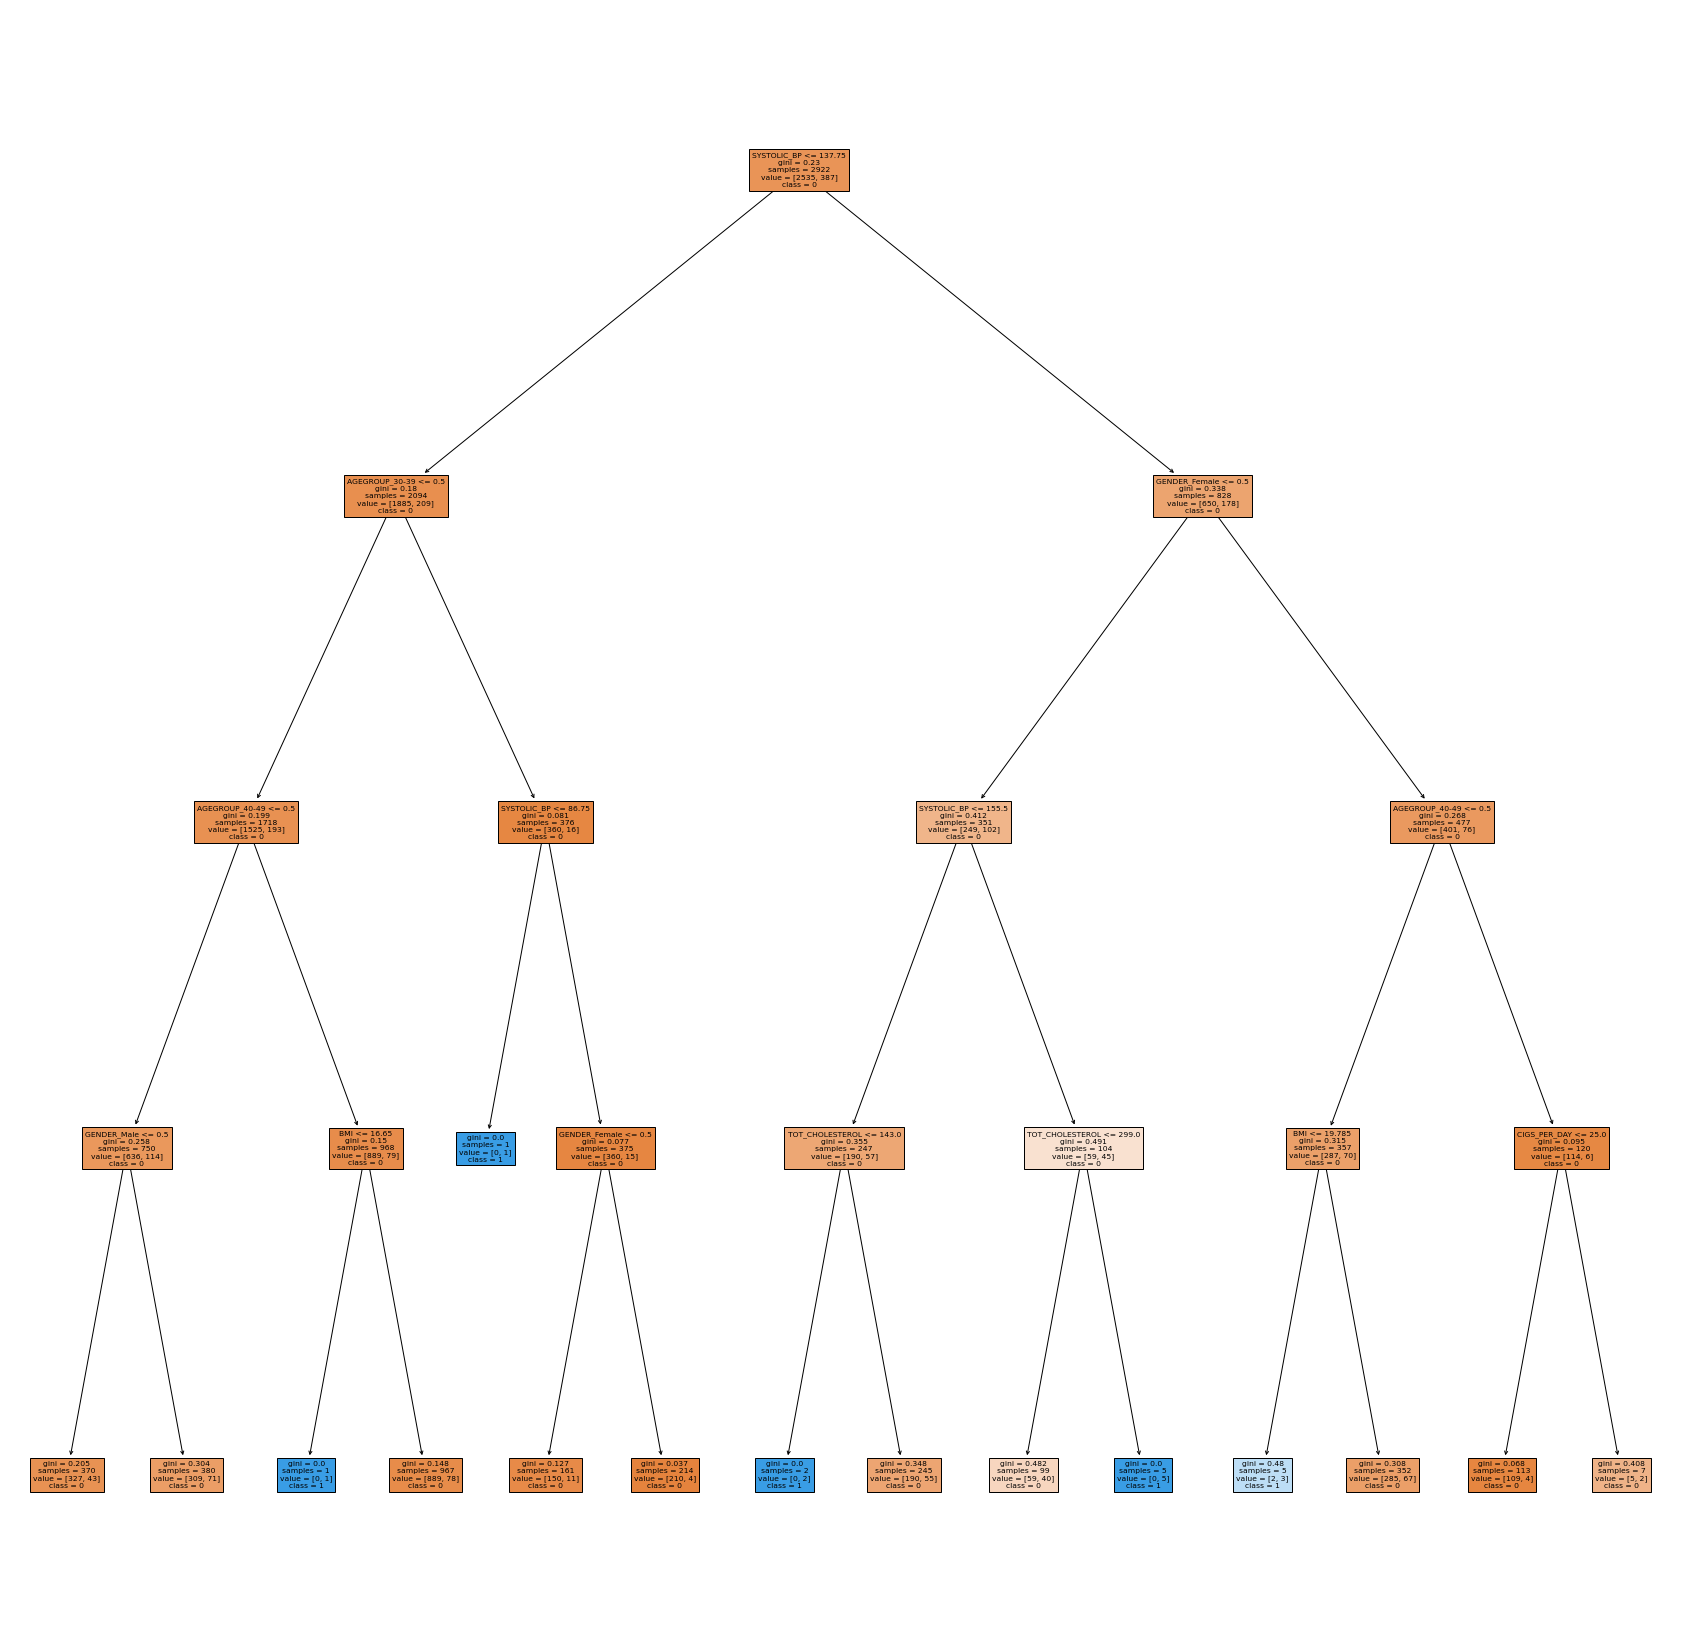

In [22]:
f=plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])

Predict the **train** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  True 0  |  False 0 |            
| Actual 1  |  False 1 |  True 1  |    
|                   | Predicted 0| Predicted 1| 

<AxesSubplot:>

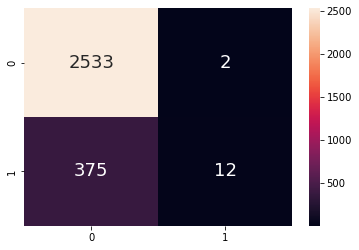

In [24]:
y_train_pred = dectree.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [25]:
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_0=cmTrain[0][0]
true_1=cmTrain[1][1]

false_0 =cmTrain[0][1]
false_1 = cmTrain[1][0]


print("True 0 Train :\t", (true_0/(true_0 + false_0)))
print("False 0 Train :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Train :\t", (true_1/(true_1 + false_1)))
print("False 1 Train :\t", (false_1/(true_1 + false_1)))
print()



Train Data
Accuracy  :	 0.8709787816563997

True 0 Train :	 0.9992110453648915
False 0 Train :	 0.0007889546351084812

True 1 Train :	 0.031007751937984496
False 1 Train :	 0.9689922480620154



Predict the **test** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  True 0  |  False 0 |            
| Actual 1  |  False 1 |  True 1  |    
|                   | Predicted 0| Predicted 1| 

<AxesSubplot:>

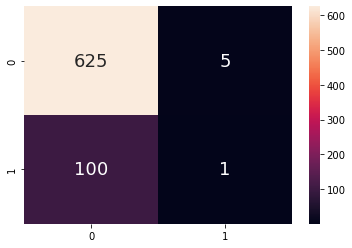

In [26]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [28]:
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_0=cmTest[0][0]
true_1=cmTest[1][1]

false_0 =cmTest[0][1]
false_1 = cmTest[1][0]


print("True 0 Test :\t", (true_0/(true_0 + false_0)))
print("False 0 Test :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Test :\t", (true_1/(true_1 + false_1)))
print("False 1 Test :\t", (false_1/(true_1 + false_1)))
print()

Test Data
Accuracy  :	 0.8563611491108071

True 0 Test :	 0.9920634920634921
False 0 Test :	 0.007936507936507936

True 1 Test :	 0.009900990099009901
False 1 Test :	 0.9900990099009901



There seems to be an extremely high true rate for in the absence of `HEART_STROKE`, (0), but also an extremely high false rate in the presence of `HEART_STROKE`(1), in both of our train and test data. This is most likely due to the fact that our classes of data are highly imbalanced. We will try to improve the prediction using the resampling technique. One thing to note is although the accuracy being around 0.85, we should not be too satisfied with the current model because it is biased towards class the absence of `HEART_STROKE`(0), due to it being much bigger in size.

## Resample

A classification data set with skewed class proportions is called **imbalanced**. Classes that make up a large proportion of the data set are called **majority classes**. Those that make up a smaller proportion are **minority classes**.

What counts as imbalanced? The answer could range from mild to extreme, as the table below shows.

| Degree of Imbalance | Proportion of Minority Class |
| :------------------ | ----------------------------:|
| Mild                | 20-40% of the data set       |
| Moderate            | 1-20% of the data set        |
| Extreme             | <1% of the data set          |

More details at: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

In [29]:
heart_dis_cln_ohe["HEART_STROKE"].value_counts()

0    3165
1     488
Name: HEART_STROKE, dtype: int64

The minority class takes up roughly **13.4%** of the data set. This means that the minority class of the presence of `HEART_STROKE` (1) falls in the moderate category, making the data rather imbalanced...

### Resample - Upsampling

The model resamples arrays or sparse matrices in a consistent way. Here, we use it to upsample our size of ```HEART_STROKE```  . We are going to increase the class of the presence of `HEART_STROKE` (1) to the absence of `HEART_STROKE` (0). By applying this step, we solve the issue of the biased data. However, it might affect our prediction accuracy. We will solve the new issue in a later part.\
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html


Import the essential library.

> resample: Resample arrays or sparse matrices in a consistent way.

In [30]:
from sklearn.utils import resample

We then separate the data into the presence and absence of `HEART_STROKE` . We then resample them to the size of the class of the absence of  ```HEART_STROKE``` . (0)

In [31]:
absent = heart_dis_cln_ohe[heart_dis_cln_ohe.HEART_STROKE == 0]
present = heart_dis_cln_ohe[heart_dis_cln_ohe.HEART_STROKE == 1]

In [32]:
present_up = resample(present, replace=True, n_samples=absent.shape[0])

Upon completing the resample process, we now concatenate the data back to make it balanced.

In [34]:
heart_dis_cln_ohe_up = pd.concat([absent, present_up])
heart_dis_cln_ohe_up["HEART_STROKE"].value_counts()

0    3165
1    3165
Name: HEART_STROKE, dtype: int64

With that our data is exactly balanced of the number of values of the absence and presence of `HEART_STROKE`. This can be further seen from the catplot below.

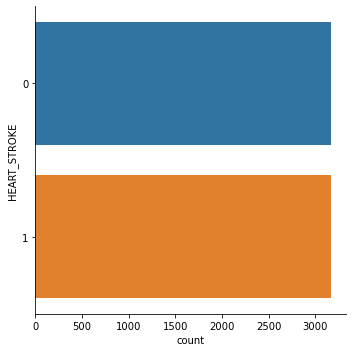

In [35]:
sb.catplot(y = "HEART_STROKE", data = heart_dis_cln_ohe_up, kind = "count")

In [36]:
heart_dis_cln_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6330 entries, 0 to 1446
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CIGS_PER_DAY              6330 non-null   float32
 1   TOT_CHOLESTEROL           6330 non-null   float32
 2   SYSTOLIC_BP               6330 non-null   float32
 3   DIASTOLIC_BP              6330 non-null   float32
 4   BMI                       6330 non-null   float32
 5   HEART_RATE                6330 non-null   float32
 6   GLUCOSE_LEVEL             6330 non-null   float32
 7   AGEGROUP_30-39            6330 non-null   float64
 8   AGEGROUP_40-49            6330 non-null   float64
 9   AGEGROUP_50-59            6330 non-null   float64
 10  AGEGROUP_60-69            6330 non-null   float64
 11  AGEGROUP_70-79            6330 non-null   float64
 12  GENDER_Female             6330 non-null   float64
 13  GENDER_Male               6330 non-null   float64
 14  EDUCATIO

Export the upsampled (plus encoded) dataset so that we can use it later.

In [37]:
heart_dis_cln_ohe_up.to_csv('heart_dis_cln_ohe_up.csv', index=False)

## DecisionTreeClassifier (upsampled data)

We then perform ```DecisionTreeClassifier``` again with the same steps, but now we have a balanced data set. 

[Text(0.5, 0.9, 'SYSTOLIC_BP <= 131.75\ngini = 0.5\nsamples = 5064\nvalue = [2521, 2543]\nclass = 1'),
 Text(0.25, 0.7, 'TOT_CHOLESTEROL <= 209.5\ngini = 0.479\nsamples = 2674\nvalue = [1610, 1064]\nclass = 0'),
 Text(0.125, 0.5, 'AGEGROUP_50-59 <= 0.5\ngini = 0.391\nsamples = 770\nvalue = [565, 205]\nclass = 0'),
 Text(0.0625, 0.3, 'HEART_RATE <= 62.5\ngini = 0.345\nsamples = 640\nvalue = [498, 142]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.485\nsamples = 133\nvalue = [78, 55]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.284\nsamples = 507\nvalue = [420, 87]\nclass = 0'),
 Text(0.1875, 0.3, 'GLUCOSE_LEVEL <= 81.5\ngini = 0.5\nsamples = 130\nvalue = [67, 63]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.467\nsamples = 97\nvalue = [36, 61]\nclass = 1'),
 Text(0.21875, 0.1, 'gini = 0.114\nsamples = 33\nvalue = [31, 2]\nclass = 0'),
 Text(0.375, 0.5, 'SYSTOLIC_BP <= 116.25\ngini = 0.495\nsamples = 1904\nvalue = [1045, 859]\nclass = 0'),
 Text(0.3125, 0.3, 'CIGS_PER_DAY <= 9.5\ngini = 0.457

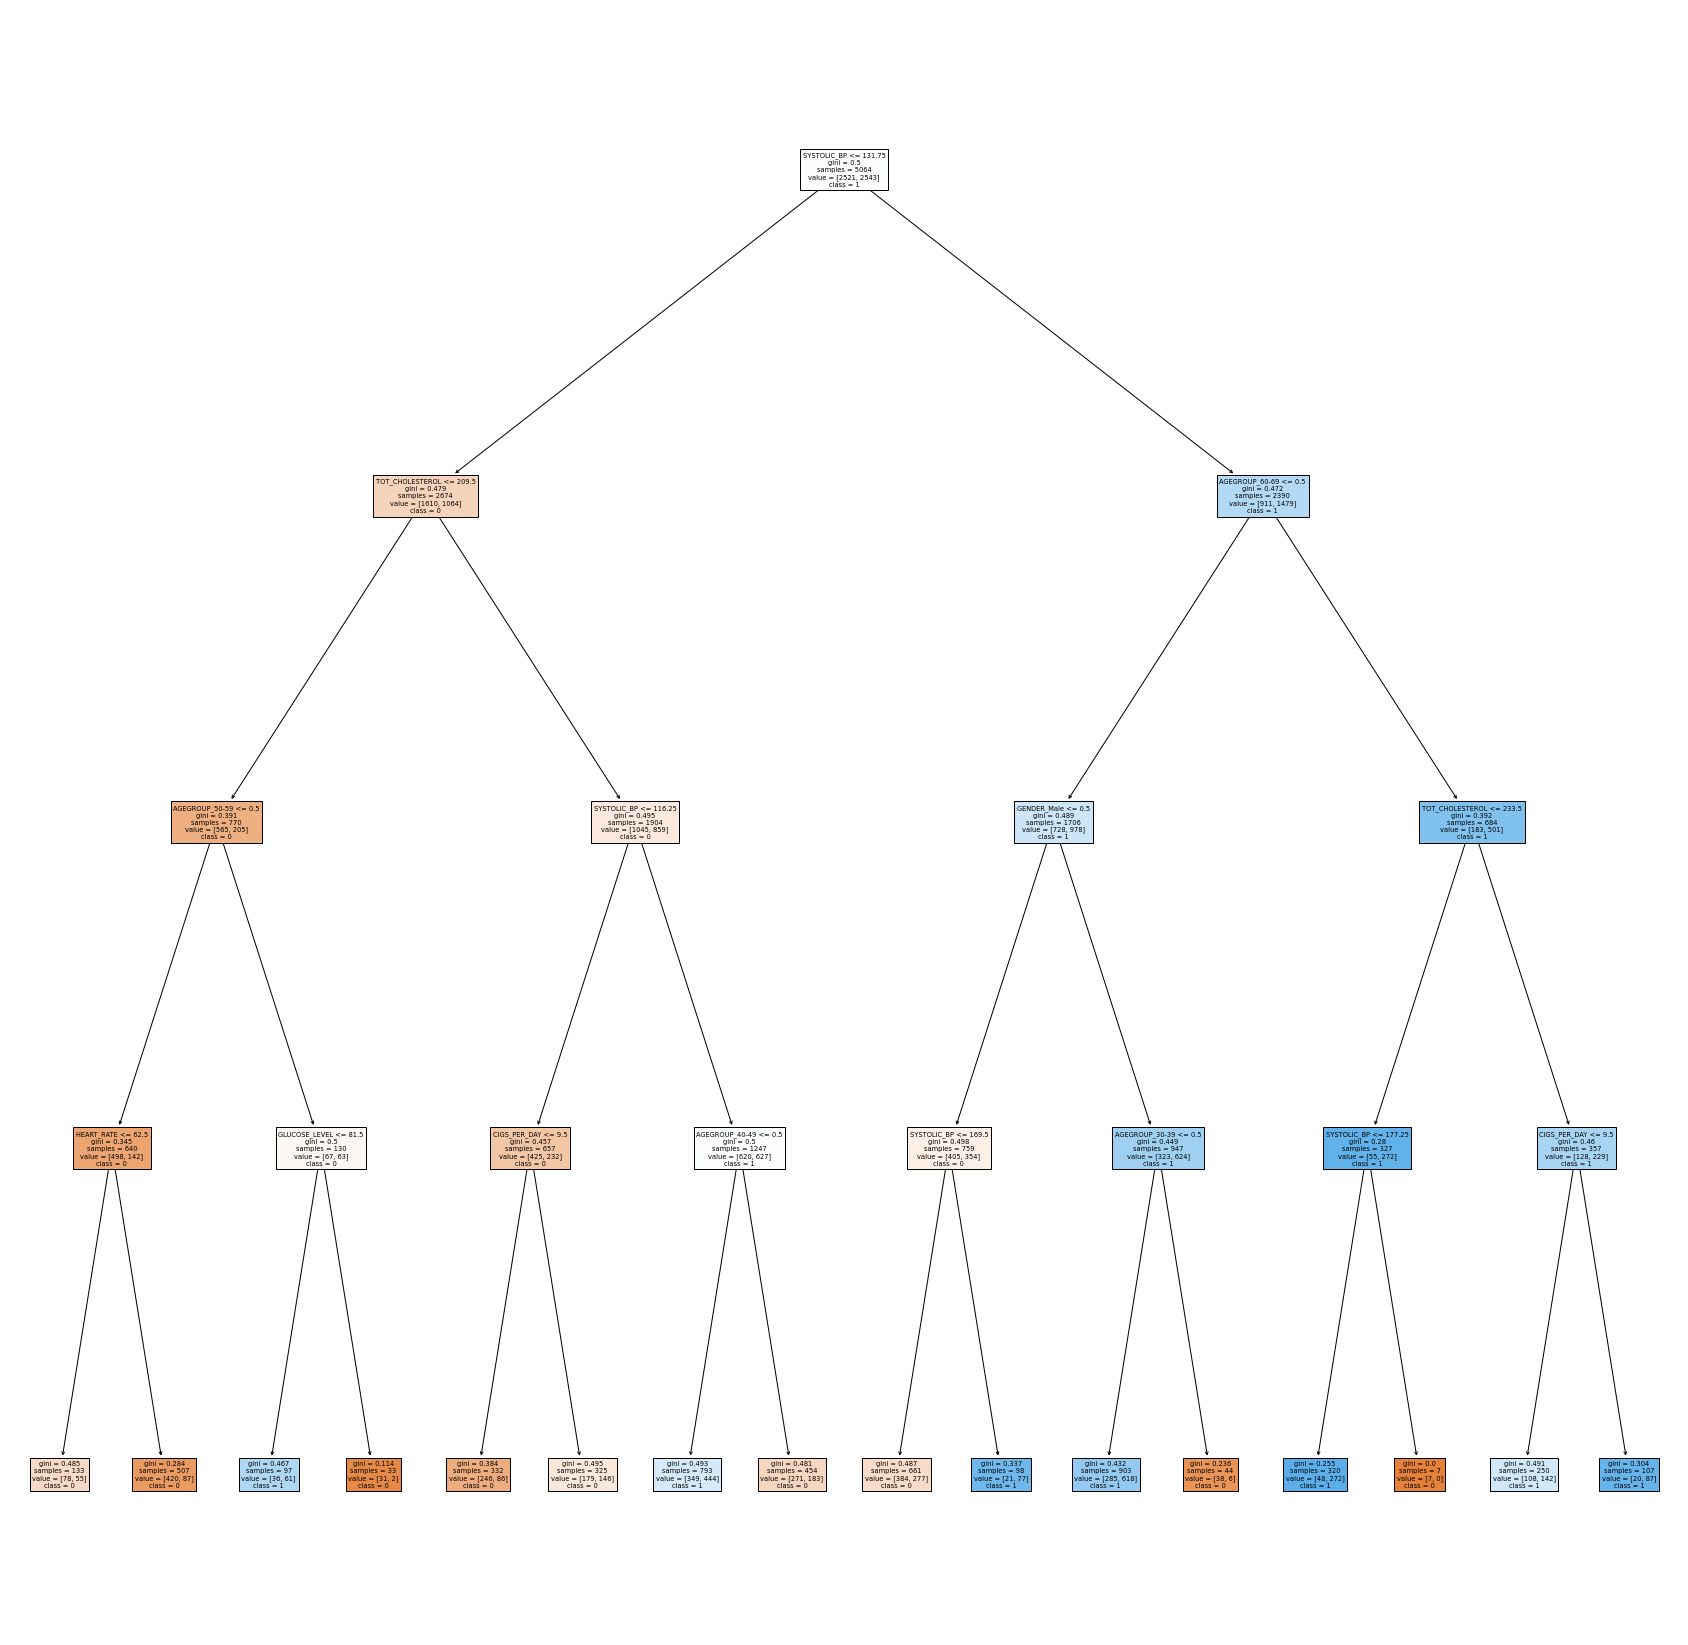

In [39]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

dectree=DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

f=plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])

<AxesSubplot:>

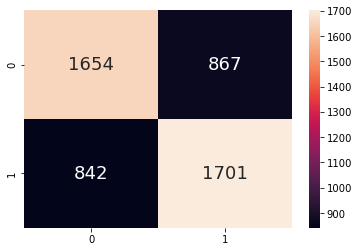

In [40]:
y_train_pred = dectree.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [41]:
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_0=cmTrain[0][0]
true_1=cmTrain[1][1]

false_0 =cmTrain[0][1]
false_1 = cmTrain[1][0]


print("True 0 Train :\t", (true_0/(true_0 + false_0)))
print("False 0 Train :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Train :\t", (true_1/(true_1 + false_1)))
print("False 1 Train :\t", (false_1/(true_1 + false_1)))
print()

Train Data
Accuracy  :	 0.6625197472353871

True 0 Train :	 0.6560888536295121
False 0 Train :	 0.3439111463704879

True 1 Train :	 0.668895005898545
False 1 Train :	 0.331104994101455



<AxesSubplot:>

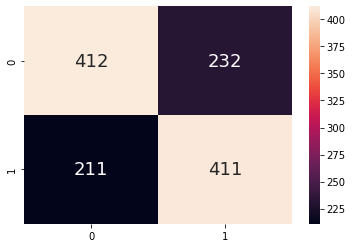

In [42]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [43]:
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_0=cmTest[0][0]
true_1=cmTest[1][1]

false_0 =cmTest[0][1]
false_1 = cmTest[1][0]


print("True 0 Test :\t", (true_0/(true_0 + false_0)))
print("False 0 Test :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Test :\t", (true_1/(true_1 + false_1)))
print("False 1 Test :\t", (false_1/(true_1 + false_1)))
print()

Test Data
Accuracy  :	 0.6500789889415481

True 0 Test :	 0.639751552795031
False 0 Test :	 0.36024844720496896

True 1 Test :	 0.6607717041800643
False 1 Test :	 0.3392282958199357



Although the accuracy is lower, we now have an accuracy result which is not biased towards a specific category due to the imbalance of the number of data. We will now tackle the issue of the decreased accuracy value.

## Cross-validation (GridSearchCV) on DecisionTreeClassifier

The model performs exhaustive search over specified parameter values for an estimator. Important members are fit, predict.


More details can be found at this link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

---

What is **cross-validation**?\
Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.\
More details at: https://www.mygreatlearning.com/blog/cross-validation/

In [45]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

We build a ```GridSearchCV``` model, with ```DecisionTreeClassifier``` as our parameter. Other parameters include max_depth of 2 to 10, cv equals to 10-fold and accuracy as the strategy to evaluate the performance.

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(2, 10)}             

svrGrid = GridSearchCV(DecisionTreeClassifier(),   
                      param_grid,                 
                      cv = 10,                     
                      scoring = 'accuracy')       

svrGrid.fit(X_train, y_train.HEART_STROKE.ravel())

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

We can then obtain the choice and the score for the best model.

In [47]:
print(svrGrid.best_estimator_)

print(np.abs(svrGrid.best_score_))

DecisionTreeClassifier(max_depth=9)
0.7723160340217196


If we increase the cv and param_grid to cross-validate, we can actually obtain a result which yields greater accuracy. However, running the function with larger parameters will be very time-consuming, and we want to avoid overfitting the data. Therefore, we will choose the parameters as shown above.

## DecisionTreeClassifier (using the best model from GridSearchCV)

We now use the optimal parameters we get from cross-validation to perform ```DecisionTreeClassifier``` again with the same steps

[Text(0.6304719129554656, 0.95, 'SYSTOLIC_BP <= 131.75\ngini = 0.5\nsamples = 5064\nvalue = [2535, 2529]\nclass = 0'),
 Text(0.3710779352226721, 0.85, 'TOT_CHOLESTEROL <= 240.5\ngini = 0.476\nsamples = 2692\nvalue = [1638, 1054]\nclass = 0'),
 Text(0.2305161943319838, 0.75, 'AGEGROUP_50-59 <= 0.5\ngini = 0.442\nsamples = 1615\nvalue = [1082, 533]\nclass = 0'),
 Text(0.15258097165991902, 0.65, 'AGEGROUP_60-69 <= 0.5\ngini = 0.387\nsamples = 1196\nvalue = [882, 314]\nclass = 0'),
 Text(0.1007085020242915, 0.55, 'EDUCATION_Uneducated <= 0.5\ngini = 0.359\nsamples = 1049\nvalue = [803, 246]\nclass = 0'),
 Text(0.058704453441295545, 0.45, 'GLUCOSE_LEVEL <= 78.5\ngini = 0.299\nsamples = 700\nvalue = [572, 128]\nclass = 0'),
 Text(0.032388663967611336, 0.35, 'DIASTOLIC_BP <= 63.75\ngini = 0.367\nsamples = 483\nvalue = [366, 117]\nclass = 0'),
 Text(0.016194331983805668, 0.25, 'BMI <= 24.695\ngini = 0.486\nsamples = 48\nvalue = [20, 28]\nclass = 1'),
 Text(0.008097165991902834, 0.15, 'TOT_CHOL

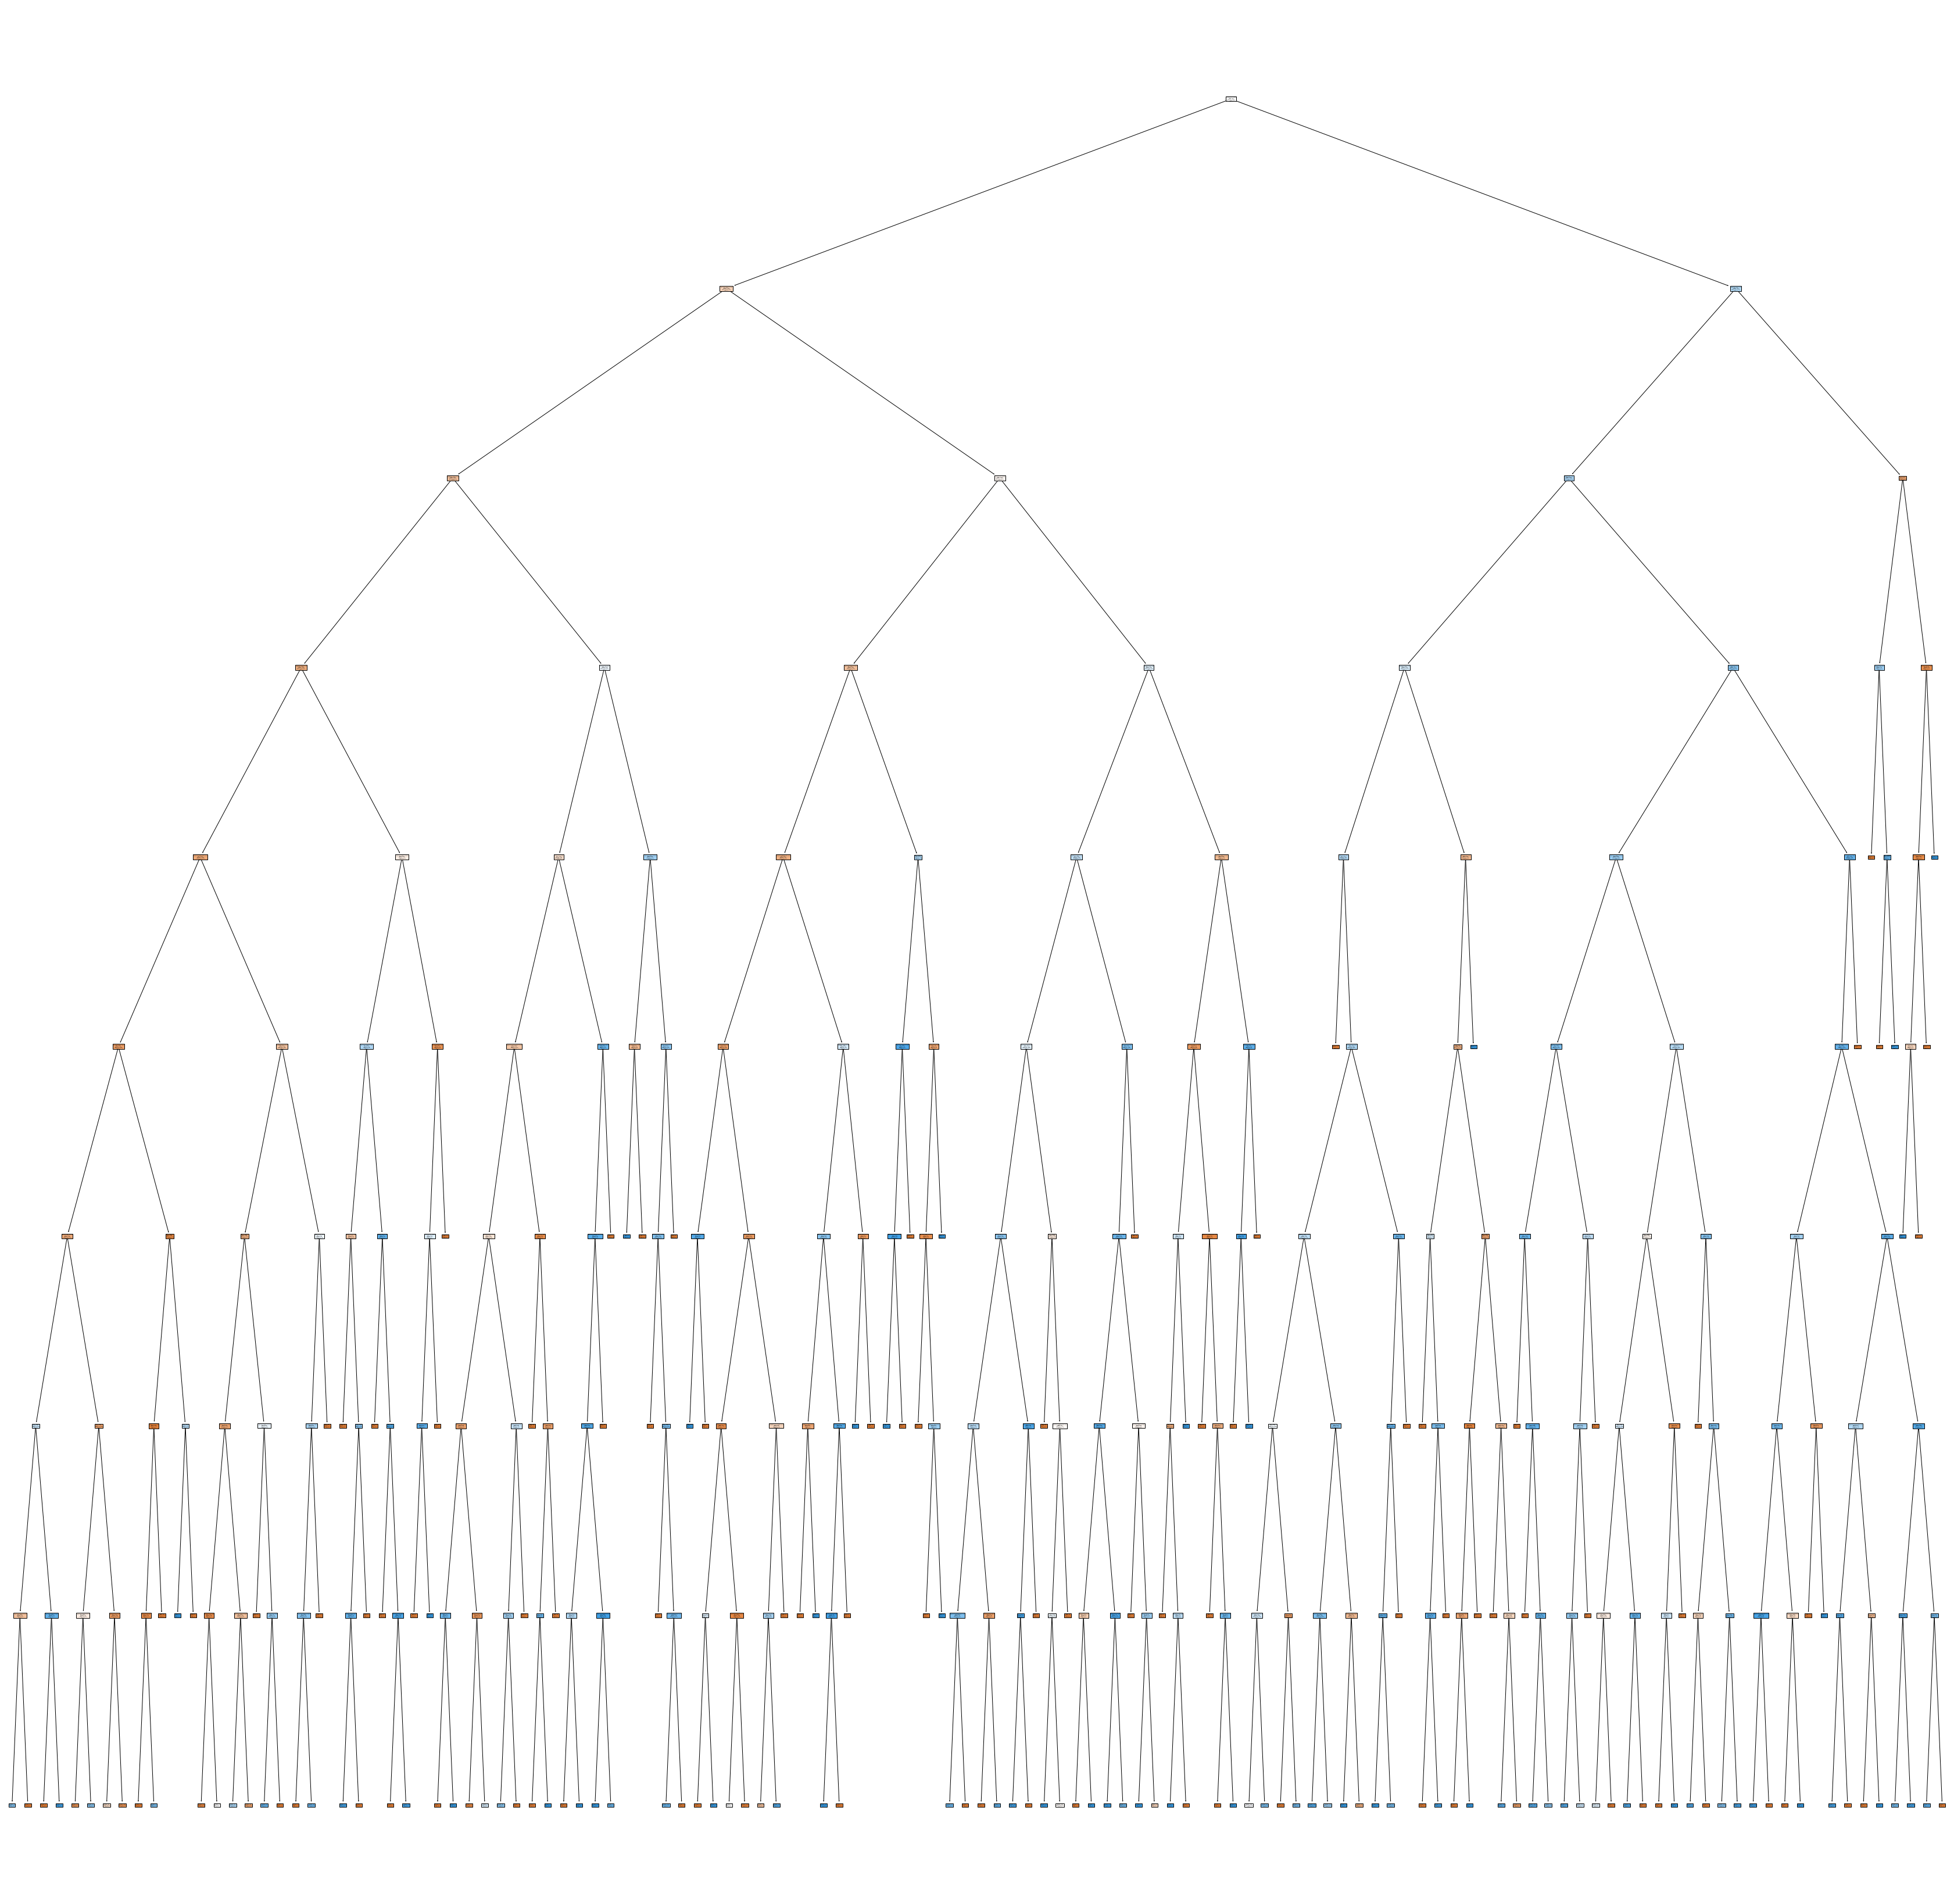

In [48]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

dectree=DecisionTreeClassifier(max_depth=9)
dectree.fit(X_train, y_train)

f=plt.figure(figsize=(60,60))
plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])

<AxesSubplot:>

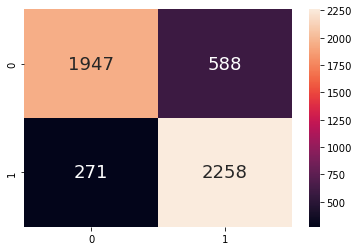

In [49]:
y_train_pred = dectree.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [50]:
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_0=cmTrain[0][0]
true_1=cmTrain[1][1]

false_0 =cmTrain[0][1]
false_1 = cmTrain[1][0]


print("True 0 Train :\t", (true_0/(true_0 + false_0)))
print("False 0 Train :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Train :\t", (true_1/(true_1 + false_1)))
print("False 1 Train :\t", (false_1/(true_1 + false_1)))
print()

Train Data
Accuracy  :	 0.8303712480252765

True 0 Train :	 0.7680473372781065
False 0 Train :	 0.2319526627218935

True 1 Train :	 0.8928430209568999
False 1 Train :	 0.10715697904310004



<AxesSubplot:>

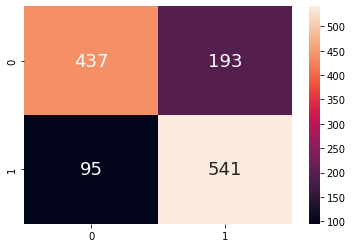

In [51]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [52]:
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_0=cmTest[0][0]
true_1=cmTest[1][1]

false_0 =cmTest[0][1]
false_1 = cmTest[1][0]


print("True 0 Test :\t", (true_0/(true_0 + false_0)))
print("False 0 Test :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Test :\t", (true_1/(true_1 + false_1)))
print("False 1 Test :\t", (false_1/(true_1 + false_1)))
print()

Test Data
Accuracy  :	 0.7725118483412322

True 0 Test :	 0.6936507936507936
False 0 Test :	 0.30634920634920637

True 1 Test :	 0.85062893081761
False 1 Test :	 0.14937106918238993



By using the parameters we got from cross-validation, we can now build our model which is of higher accuracy, for both our train and test data

## RandomForestClassifier (upsampled data)

We have done ```DecisionTreeClassifier``` above. Now let us use ```RandomForestClassifier``` to build a better model. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Similarly, we are going to use all the predictors we have to predict the presence of `HEART_STROKE`.

Import the essential libraries.

> RandomForestClassifier: A random forest classifier.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

Create a ```RandomForestClassifier``` object with the following parameters:
- n_estimators: 100
- max_depth: 4
- Leaving other parameters as default

Fit the model using the **train** data.

In [55]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 4)       

rfc.fit(X_train, y_train.HEART_STROKE.ravel())

RandomForestClassifier(max_depth=4)

Predict the **train** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  True 0  |  False 0 |            
| Actual 1  |  False 1 |  True 1  |    
|                   | Predicted 0| Predicted 1| 

In [59]:
y_train_pred = rfc.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rfc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_0=cmTrain[0][0]
true_1=cmTrain[1][1]

false_0 =cmTrain[0][1]
false_1 = cmTrain[1][0]


print("True 0 Train :\t", (true_0/(true_0 + false_0)))
print("False 0 Train :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Train :\t", (true_1/(true_1 + false_1)))
print("False 1 Train :\t", (false_1/(true_1 + false_1)))
print()

Train Data
Accuracy  :	 0.6923380726698263

True 0 Train :	 0.7069438995684583
False 0 Train :	 0.2930561004315418

True 1 Train :	 0.6775347912524851
False 1 Train :	 0.3224652087475149



<AxesSubplot:>

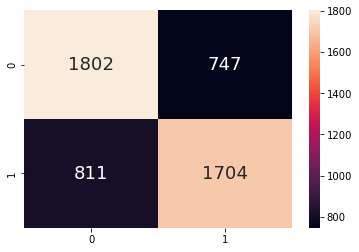

In [58]:
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Predict the **test** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  True 0  |  False 0 |            
| Actual 1  |  False 1 |  True 1  |    
|                   | Predicted 0| Predicted 1| 

Test Data
Accuracy  :	 0.6879936808846762

True 0 Test :	 0.6866883116883117
False 0 Test :	 0.3133116883116883

True 1 Test :	 0.6892307692307692
False 1 Test :	 0.31076923076923074



<AxesSubplot:>

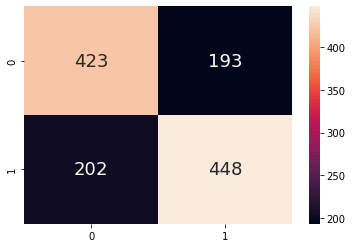

In [60]:
y_test_pred = rfc.predict(X_test)
print("Test Data")
print("Accuracy  :\t", rfc.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_0=cmTest[0][0]
true_1=cmTest[1][1]

false_0 =cmTest[0][1]
false_1 = cmTest[1][0]


print("True 0 Test :\t", (true_0/(true_0 + false_0)))
print("False 0 Test :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Test :\t", (true_1/(true_1 + false_1)))
print("False 1 Test :\t", (false_1/(true_1 + false_1)))
print()

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Compared to the cross-validated `DecisionTreeClassifier`, the accuracy of this is quite a fair bit lower. This could be due to factors such as the depth of tree used or other parameters. Although the accuracy of *True 0* and *True 1* are higher in the `DecisionTreeClassifier` than in the `RandomForestClassifier`, the accuracy for each category is more balanced in `RandomForestClassifier` model. `RandomForestClassifier` is still preferred due to it not overfitting as well as error due to biasness as compared to a `DecisionTreeClassifier`. 

## Cross-validation (GridSearchCV) on RandomForestClassifier

Similarly, we will now perform cross-validation using ```GridSearchCV``` for ```RandomForestClassifier``` to determine the best parameters to be used.

In [62]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

We build a ```GridSearchCV``` model, with ```RandomForestClassifier``` as our parameter. Other parameters include n_estimators of 100 to 500, max_depth of 4 to 10, cv equals to 5-fold and accuracy as the strategy to evaluate the performance. Note that we can actually insrease the range to perform our cross-validation. However, this will require significantly more time for the running of the code.

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(100,501,100), 'max_depth': np.arange(4, 10)}             

svrGrid = GridSearchCV(RandomForestClassifier(),   
                      param_grid,                 
                      cv = 5,                     
                      scoring = 'accuracy')       

svrGrid.fit(X_train, y_train.HEART_STROKE.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='accuracy')

We can then obtain the choice and the score for the best model.

In [64]:
print(svrGrid.best_estimator_)

print(np.abs(svrGrid.best_score_))

RandomForestClassifier(max_depth=9, n_estimators=500)
0.839652891852557


Similar to the case above, if we increase the cv and param_grid to cross-validate, we can actually obtain a result which yield greater accuracy. However, running with larger parameters will be very time-consuming. Therefore, we will choose the parameters as shown above.

## RandomForestClassifier (best model from GridSearchCV)

We now use the optimal parameters we obtained from cross-validation to perform RandomForestClassifier again. The steps are exactly the same as what we did just now.

In [65]:
y = pd.DataFrame(heart_dis_cln_ohe_up["HEART_STROKE"])
X = pd.DataFrame(heart_dis_cln_ohe_up.drop("HEART_STROKE", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rfc = RandomForestClassifier(n_estimators = 400, max_depth = 9)       
rfc.fit(X_train, y_train.HEART_STROKE.ravel())

RandomForestClassifier(max_depth=9, n_estimators=400)

Train Data
Accuracy  :	 0.8988941548183255

True 0 Train :	 0.8733572281959379
False 0 Train :	 0.12664277180406214

True 1 Train :	 0.9240109674892284
False 1 Train :	 0.07598903251077165



<AxesSubplot:>

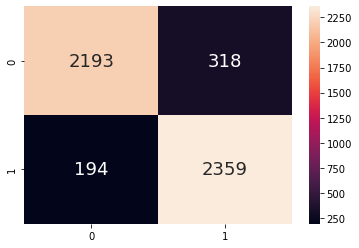

In [67]:
y_train_pred = rfc.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rfc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_0=cmTrain[0][0]
true_1=cmTrain[1][1]

false_0 =cmTrain[0][1]
false_1 = cmTrain[1][0]


print("True 0 Train :\t", (true_0/(true_0 + false_0)))
print("False 0 Train :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Train :\t", (true_1/(true_1 + false_1)))
print("False 1 Train :\t", (false_1/(true_1 + false_1)))
print()

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8704581358609794

True 0 Test :	 0.8409785932721713
False 0 Test :	 0.15902140672782875

True 1 Test :	 0.9019607843137255
False 1 Test :	 0.09803921568627451



<AxesSubplot:>

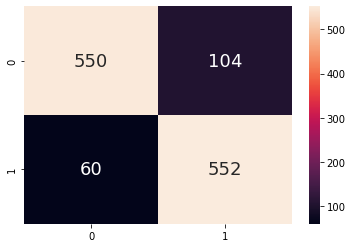

In [68]:
y_test_pred = rfc.predict(X_test)

print("Test Data")
print("Accuracy  :\t", rfc.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_0=cmTest[0][0]
true_1=cmTest[1][1]

false_0 =cmTest[0][1]
false_1 = cmTest[1][0]


print("True 0 Test :\t", (true_0/(true_0 + false_0)))
print("False 0 Test :\t", (false_0/(true_0 + false_0)))
print()

print("True 1 Test :\t", (true_1/(true_1 + false_1)))
print("False 1 Test :\t", (false_1/(true_1 + false_1)))
print()

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


As you can see, by using the parameters we got from cross-validation, a model of much higher accuracy can be built now. This applies to both the train and the test data sets.